In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from data_prep import DataPrep
from linear_regression import StockLinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import random


In [2]:
data_prep = DataPrep()
stock_linear_regression = StockLinearRegression()

In [3]:
df = data_prep.load_raw_data(laptop=True)
df = data_prep.prep_raw_data(df=df)
df = data_prep.calc_rsi(df=df)

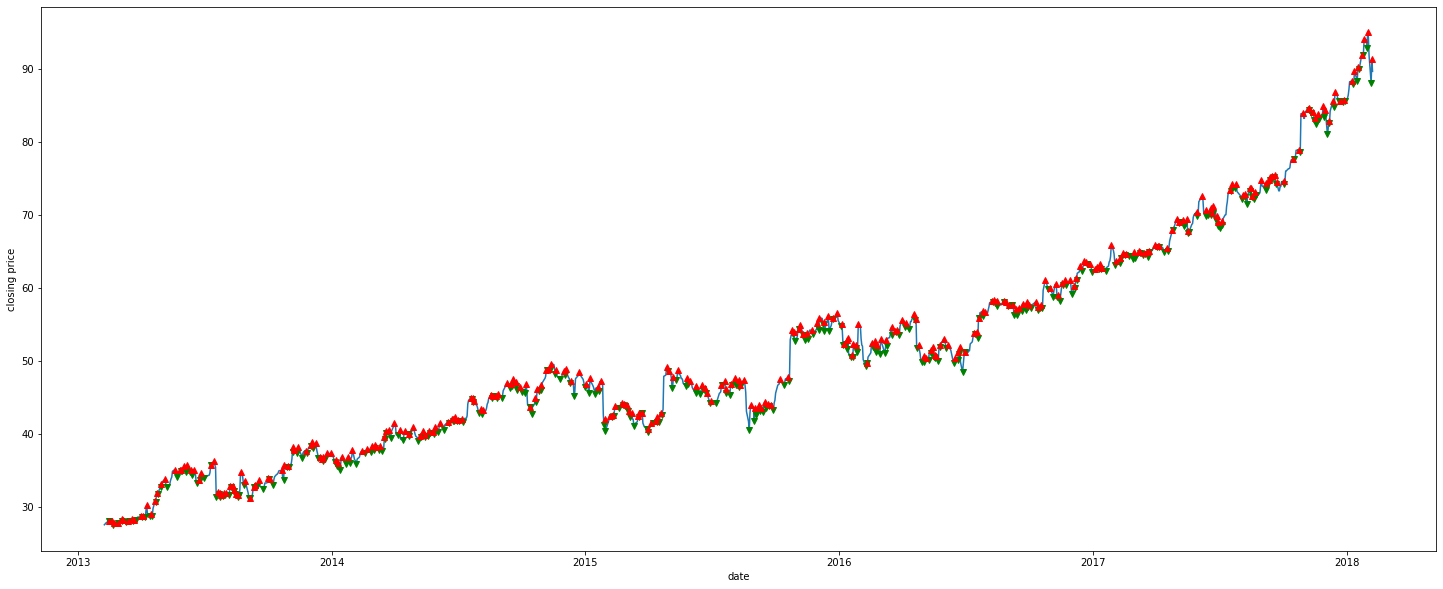

In [4]:
x = df['date']
y = df['close']
y1 = df['local_min']
y2 = df['local_max']

plt.figure(figsize=(25,10))
plt.plot(x, y)
plt.plot(x, y1, lw=10, color='green', marker="v")
plt.plot(x, y2, lw=10, color='red', marker="^")
plt.xlabel("date")
plt.ylabel("closing price")
plt.show()

In [5]:
coef_data = stock_linear_regression.create_coef_data(df=df, days = [3,5,7,10,20])

In [6]:
training_data = data_prep.prep_training_data(coef_df=coef_data, stock_df=df)

In [7]:
training_data 

,3_day_linear_regression,5_day_linear_regression,7_day_linear_regression,10_day_linear_regression,20_day_linear_regression,normalized_value,volume,RSI,target
0,9.570869e-16,7.566335e-16,3.650758e-16,-6.358840e-17,1.109928e-16,-0.931777,35836861,55.922899,1
1,1.068376e-15,3.777952e-16,-1.755401e-16,-1.429037e-16,1.306126e-16,-0.553560,34849287,58.701135,0
2,-3.472222e-16,-5.902778e-16,-5.389948e-16,-2.422433e-16,1.633914e-16,-0.534014,38163549,56.625399,0
3,-1.215278e-15,-8.134609e-16,-5.468188e-16,-1.453252e-16,2.297951e-16,-0.796685,41431097,59.777281,0
4,-5.208333e-16,-4.655542e-16,-1.599863e-16,6.095942e-17,2.812724e-16,-0.674060,51448452,51.437498,1
...,...,...,...,...,...,...,...,...,...
1241,-1.729879e-14,-7.707124e-15,-7.707124e-15,-7.707124e-15,-7.707124e-15,-0.295395,47227882,73.691600,0
1242,-4.366987e-15,-3.959987e-15,-3.959987e-15,-3.959987e-15,-3.959987e-15,-0.693715,47867753,58.225421,0
1243,9.317130e-15,9.317130e-15,9.317130e-15,9.317130e-15,9.317130e-15,-0.943801,51031465,49.510120,1
1244,-1.990741e-14,-1.990741e-14,-1.990741e-14,-1.990741e-14,-1.990741e-14,5.148051,67998564,53.958783,0


In [8]:
X = training_data.drop(columns = 'target')
y = training_data['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [11]:
preds = clf.predict(X_test)

In [12]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

In [13]:
print("Train Score:", train_score)
print("Test_Score:", test_score)

Train Score: 0.7462526766595289
Test_Score: 0.7532051282051282


In [13]:
logReg = LogisticRegression()
grid_vals = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1], 'solver' : ['lbfgs']}
grid_logReg =  GridSearchCV(estimator=logReg, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

In [14]:
grid_logReg.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             return_train_score=True, scoring='accuracy')

In [15]:
preds = grid_logReg.best_estimator_.predict(X_test)

In [16]:
score = grid_logReg.best_estimator_.score(X_test, y_test)

In [17]:
score

0.7532051282051282

In [18]:
cm = metrics.confusion_matrix(y_test, preds)

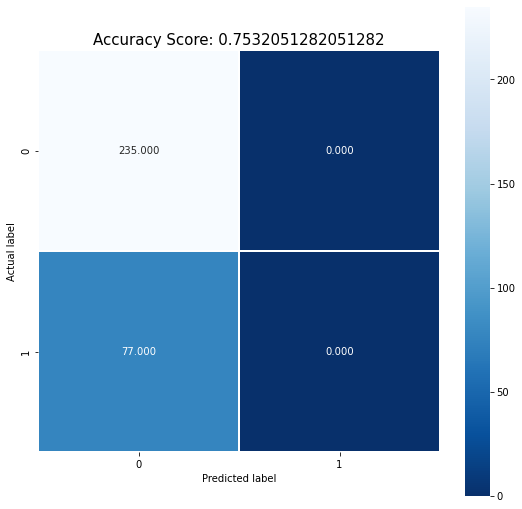

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);